In [777]:
# Importing required modules
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score
import collections
import pickle

In [778]:
# Reading in dataset/Bank-Churn-data.csv
dataset= pd.read_csv('data\Bank-Churn-data.csv')

#seperating input and output values
x=dataset.iloc[:, 3:-1].values
y=dataset.iloc[:, -1].values
print(x[0])
print(y[0])

[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
1


In [779]:
print(x[0])
#Changing input string parameters to integer
LE=LabelEncoder()
x[:, 2]=LE.fit_transform(x[:, 2])
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x[0])

[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]


### Baseline model

In [780]:
#Seperating the Train, Test and Validation data
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.3, random_state = 0)
X_test1, X_validation1, y_test1, y_validation1 = train_test_split(X_test1, y_test1, test_size = 0.33, random_state = 0)

In [781]:
#Standardized Scaling to fit the data in training the model
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)
X_validation1=sc.transform(X_validation1)

The Baseline model is a Logistic Regression Model

In [782]:
#Implementing Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train1, y_train1)
from sklearn import metrics
prediction_test = model.predict(X_test1)
# Print the prediction accuracy
results=[]
results.append(metrics.accuracy_score(y_test1, prediction_test))
print(results)

[0.8099502487562189]


In [783]:
#Saving the Trained Baseline model
filename = 'data/baseline_model.h5'
pickle.dump(model, open(filename, 'wb'))

In [784]:
#Showing the Classification Report of Baseline model
y_pred1=model.predict(X_test1)
y_pred1=(y_pred1>0.5)
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1591
           1       0.62      0.23      0.34       419

    accuracy                           0.81      2010
   macro avg       0.72      0.60      0.61      2010
weighted avg       0.78      0.81      0.77      2010



## Data Exploration

In [785]:
#Remove RowNumber from the data set
df2 = dataset.iloc[:,1:]
#Converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,...,0,0,0,0,0,1,0,0,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,...,0,0,0,0,0,0,0,1,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,...,0,0,0,0,0,1,0,0,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,...,0,0,0,0,0,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,...,0,0,0,0,0,0,0,1,1,0


 ### Senior Citizens, Salarycategory : 
 Adding a new feature to the dataset.
 We are considering people above 60 years as Senior Citizens and dividing the Salary type to 3 different categories < 40K , 40K < X < 80K and X > 80K

In [786]:
#Adding two new columns to increase the model Accuracy
df2['SeniorCitizen'] =  [1 if x > 60 else 0 for x in df2['Age']]
df2['Salarycategory'] =  [0 if x < 40000 else (1 if x<80000 else 2) for x in df2['EstimatedSalary']]
column_names = list(df2.columns.values)
print(column_names)
column_names[-3],column_names[-2], column_names[-1] = column_names[-1], column_names[-2],column_names[-3]
df2=df2.reindex(columns=column_names)
df2.head()

['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'SeniorCitizen', 'Salarycategory']


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Salarycategory,SeniorCitizen,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,2,0,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,2,0,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,2,0,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,2,0,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,1,0,0


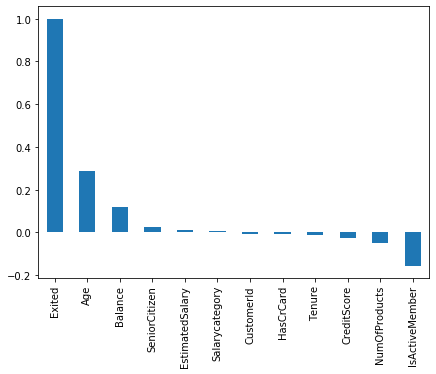

In [787]:
# Correlation of "Churn" with other variables
plt.figure(figsize=(7,5))
df2.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')

Age and Balance seem to be positively correlated with churn.

Interestingly, rest all the features seem to be negatively related to churn.

In [788]:
#seperating input and output values after adding new parameters
x=df2.iloc[:, 2:-1].values
y=df2.iloc[:, -1].values
print(x[0])

#Changing input string parameters to integer
LE=LabelEncoder()
x[:, 2]=LE.fit_transform(x[:, 2])
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x=np.array(ct.fit_transform(x))
df2.isnull().sum()
#Converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()
print(x[0])

[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88 2 0]
[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88 2 0]


Text(0.5, 1.0, '% of Senior Citizens')

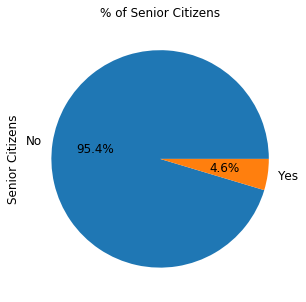

In [789]:
# Plotting the % Senior Citizen in dataset
ax = (df2['SeniorCitizen'].value_counts()*100.0 /len(df2))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

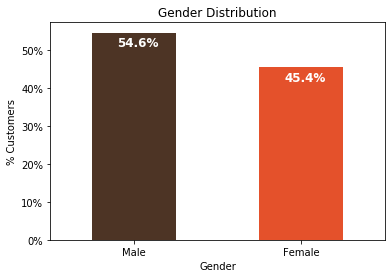

In [790]:
# Plotting the % Gender in dataset
colors = ['#4D3425','#E4512B']
ax = (df2['Gender'].value_counts()*100.0 /len(df2)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, '# of Customers by their tenure')

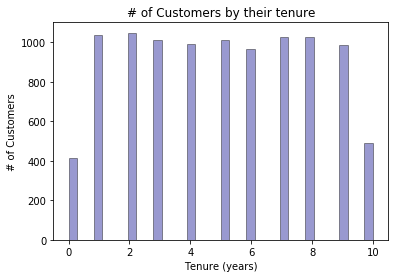

In [791]:
# Plotting the Customers by their tenure in dataset
import seaborn as sns
ax = sns.distplot(df2['Tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (years)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of Customers by Number of products')

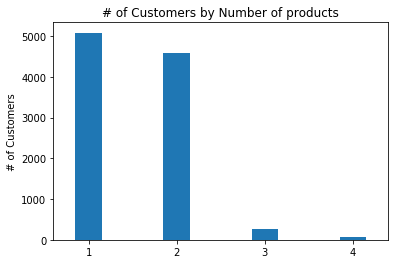

In [792]:
# Plotting the Customers by Number of Products in dataset
ax = df2['NumOfProducts'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Number of products')

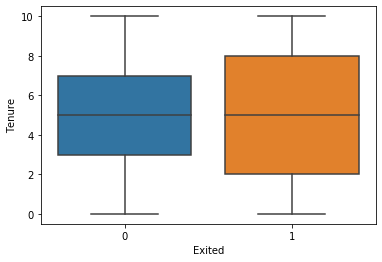

In [793]:
# Plotting the Tenure vs Churn
sns.boxplot(x = df2.Exited, y = df2.Tenure)

Churn vs Tenure: As we can see form the above plot, the customers who do not churn, they tend to stay for a lesser tenure with the Bank.

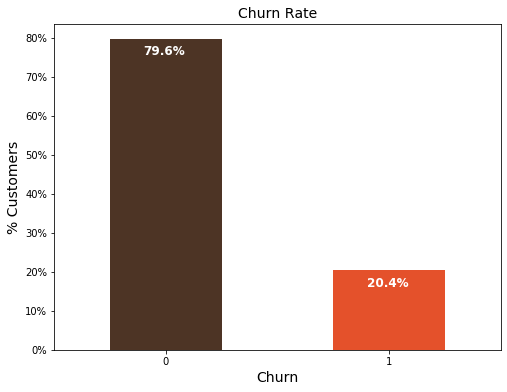

In [794]:
# Plotting the Churn rate in the dataset
colors = ['#4D3425','#E4512B']
ax = (df2['Exited'].value_counts()*100.0 /len(df2)).plot(kind='bar',stacked = True,rot = 0,color = colors,figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, 'Distribution of Credit Score by churn')

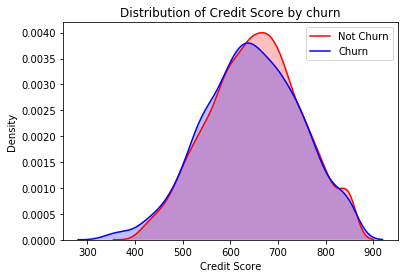

In [795]:
#Plotting the Distribution of Credit Score by churn
ax = sns.kdeplot(df2.CreditScore[(df2["Exited"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df2.CreditScore[(df2["Exited"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Credit Score')
ax.set_title('Distribution of Credit Score by churn')

Text(0.5, 1.0, 'Distribution of Balance by churn')

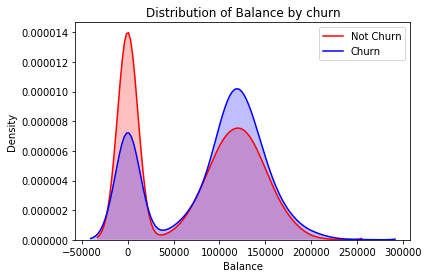

In [796]:
#Plotting the Distribution of Credit Score by churn
ax = sns.kdeplot(df2.Balance[(df2["Exited"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df2.Balance[(df2["Exited"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Balance')
ax.set_title('Distribution of Balance by churn')

Text(0.5, 1.0, 'Distribution of Estimated Salary by churn')

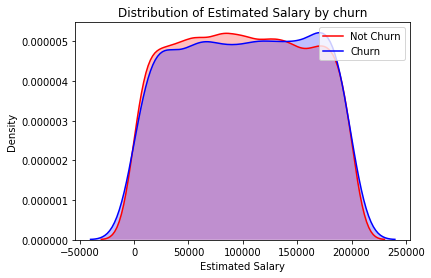

In [797]:
#Plotting the Distribution of Estimated Salary by churn
ax = sns.kdeplot(df2.EstimatedSalary[(df2["Exited"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df2.EstimatedSalary[(df2["Exited"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Estimated Salary')
ax.set_title('Distribution of Estimated Salary by churn')

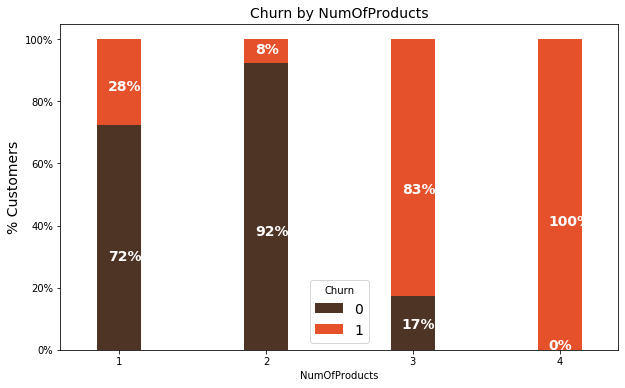

In [798]:
# Plotting Churn by NumOfProducts
colors = ['#4D3425','#E4512B']
prod_churn = df2.groupby(['NumOfProducts','Exited']).size().unstack()

ax = (prod_churn.T*100.0 / prod_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by NumOfProducts',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Churn by Number of products :  Similar to what we saw in the correlation plot, the customers who have a more products have a very high churn rate.

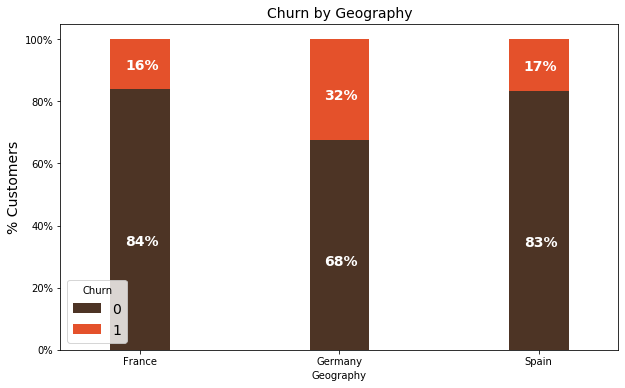

In [799]:
# Plotting Churn by Geography
colors = ['#4D3425','#E4512B']
prod_churn = df2.groupby(['Geography','Exited']).size().unstack()

ax = (prod_churn.T*100.0 / prod_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Geography',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Loading data after adding additional features and implementing baseline model 

In [800]:
#seperating input and output values after adding new parameters
x=df2.iloc[:, 2:-1].values
y=df2.iloc[:, -1].values

#Changing input string parameters to integer
LE=LabelEncoder()
x[:, 2]=LE.fit_transform(x[:, 2])
print(x[5])
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x=np.array(ct.fit_transform(x))

[645 'Spain' 1 44 8 113755.78 2 1 0 149756.71 2 0]


In [801]:
#Seperating the Train, Test and Validation data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size = 0.33, random_state = 0)

In [802]:
print(X_validation[3])
print(y_validation[6])

[0.0 1.0 0.0 706 1 34 0 140641.26 2 1 1 77271.91 1 0]
0


In [803]:
#Standardized Scaling to fit the data in training the model
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_validation=sc.transform(X_validation)

In [804]:
print(X_validation[0])

[-1.01525927  1.75478035 -0.5731713   0.1385645   0.92295821  0.01725942
  0.69700901 -0.23836603 -0.92971564  0.64198477 -1.03430227  1.22994458
  0.74920699 -0.21815257]


In [805]:
# Running logistic regression model
model1 = LogisticRegression()
result = model1.fit(X_train, y_train)
prediction_test = model1.predict(X_test)
# Print the prediction accuracy
results.append(metrics.accuracy_score(y_test, prediction_test))
print(results)

[0.8099502487562189, 0.8253731343283582]


We can see that as we added additional features the accuracy has increased in the baseline model

In [806]:
#Printing the modified input of the neural network
print(X_train[0])

[ 0.98497008 -0.56987189 -0.5731713  -0.09792126  0.92295821 -0.55759842
 -1.03635146  1.13249447  0.81039385  0.64198477  0.96683535 -0.76862426
 -0.51208424 -0.21815257]


##### Artificial neural network:
It is a 5 layer network with Gelu activation function and Adam Optimizer and binary Crossentropy as loss function and with 0.1% dropout after every layer.
It is trained with a Batch size of 16 and with 100 Epochs

In [807]:
# Artificial Neural Network model 
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=14,activation='gelu'))
ann.add(tf.keras.layers.Dropout(0.1))
ann.add(tf.keras.layers.Dense(units=16,activation='gelu'))
ann.add(tf.keras.layers.Dropout(0.1))
ann.add(tf.keras.layers.Dense(units=12,activation='gelu'))
ann.add(tf.keras.layers.Dropout(0.1))
ann.add(tf.keras.layers.Dense(units=6,activation='gelu'))
ann.add(tf.keras.layers.Dropout(0.1))
ann.add(tf.keras.layers.Dense(units=1,activation='gelu'))  

# Training the ANN model
ann.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
ann.fit(X_train,y_train,batch_size=16,epochs=100)

Epoch 1/100
438/438 [==============================] - 5s 3ms/step - loss: 0.8885 - accuracy: 0.7761
Epoch 2/100
438/438 [==============================] - 1s 3ms/step - loss: 0.5377 - accuracy: 0.7939
Epoch 3/100
438/438 [==============================] - 1s 3ms/step - loss: 0.4898 - accuracy: 0.7979
Epoch 4/100
438/438 [==============================] - 1s 3ms/step - loss: 0.4868 - accuracy: 0.8007
Epoch 5/100
438/438 [==============================] - 1s 3ms/step - loss: 0.4567 - accuracy: 0.8078
Epoch 6/100
438/438 [==============================] - 1s 3ms/step - loss: 0.4444 - accuracy: 0.8186
Epoch 7/100
438/438 [==============================] - 1s 3ms/step - loss: 0.4316 - accuracy: 0.8249
Epoch 8/100
438/438 [==============================] - 1s 3ms/step - loss: 0.4329 - accuracy: 0.8245
Epoch 9/100
438/438 [==============================] - 1s 3ms/step - loss: 0.4045 - accuracy: 0.8383
Epoch 10/100
438/438 [==============================] - 1s 3ms/step - loss: 0.4018 - accura

In [818]:
#Saving the Trained ANN model
filename = 'data/Updated_model.h5'
ann.save(filename)

In [825]:
#Showing the Classification Report of Trained ANN Model with test Data
y_pred=ann.predict(X_test)
y_pred=(y_pred>0.51) #Considering prediction accuracy greater then 51%
results.append(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1591
           1       0.84      0.46      0.60       419

    accuracy                           0.87      2010
   macro avg       0.86      0.72      0.76      2010
weighted avg       0.87      0.87      0.85      2010



In [810]:
#Showing the Classification Report of Trained ANN Model with Validation Data
y_val_pred=ann.predict(X_validation)
y_val_pred=(y_val_pred>0.51) #Considering prediction accuracy greater then 51%
print(classification_report(y_validation, y_val_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       788
           1       0.79      0.42      0.55       202

    accuracy                           0.86       990
   macro avg       0.83      0.70      0.73       990
weighted avg       0.85      0.86      0.84       990



In [811]:
#Implementing to evaluate with individual inputs
def evaluate_result(a):
    #Encoding Male and Female parameters
    a[2]= 0 if a[2]=='Female' else 1
    # OneHotEncoding geogrophy
    if (a[1]=='France'):
        a.append(1.0) 
        a.append(0.0)
        a.append(0.0)
    elif(a[1]=='Spain'):
        a.append(0.0) 
        a.append(0.0)
        a.append(1.0)
    else:
        a.append(0.0) 
        a.append(1.0)
        a.append(0.0)
    # Removing unwanted attributes
    a.remove(a[1])
    # Fitting to the trained model
    a=collections.deque(a)
    a.rotate(3)
    a=list(a)
    a.append(0 if a[7] < 40000 else (1 if a[7] < 80000 else 2))
    a.append(1 if a[5] > 60 else 0)
    a=np.array([a])
    # Predicting and returning the output as Churn or Not Churn
    y_out=(ann.predict(a) > 0.5)
    if(y_out==1):
        y_out='Churn'
    else:
        y_out='Not Churn'
    return y_out
   

In [812]:
# Printing the Implemented to evaluate function
print(evaluate_result([500 ,'Germany' ,'Male' ,43 ,7 ,140641.26 ,2 ,1 ,1 ,77271.91]))

Churn


Result Visualisation

(0.79, 0.9136567164179105)

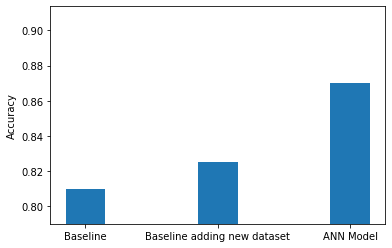

In [813]:
# Visualization of Results of Baseline model and ANN
plt.bar(['Baseline','Baseline adding new dataset','ANN Model'],results, width = 0.3)
plt.ylabel('Accuracy')
plt.ylim(0.79, None)

In [814]:
# Implementing heatmaps
def model_visualisation(classifier, classifier_name,X_test,y_test,y_pred):
    '''Assess the performance on the test set and plot the confusion matrix.'''
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, normalize='true')

    ax = sns.heatmap(cm,
                annot=True,
                annot_kws={'fontsize': 24},
                cmap='Blues' )

    ax.set_title(classifier_name)

    ax.set_xlabel('Predicted Label')
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(['Retained', 'Churned'])

    ax.set_ylabel('True Label')
    ax.set_yticks([0.2, 1.4])
    ax.set_yticklabels(['Retained', 'Churned'])

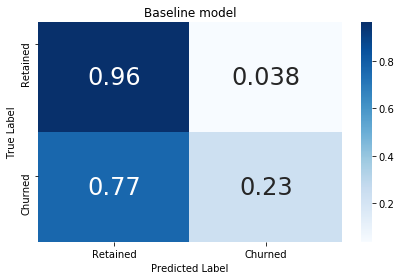

In [815]:
model_visualisation(model, 'Baseline model',X_test1,y_test1,y_pred1)
plt.tight_layout()

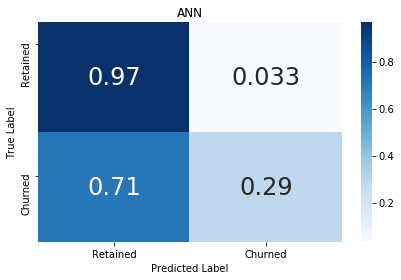

In [837]:
model_visualisation(model1, 'ANN',X_test,y_test,prediction_test)
plt.tight_layout()

#### Conclusions
The foundation of our final bank report should contain two main points:

EDA can help us figure out which characteristics contribute to customer churn. Feature importance analysis can also be used to assess the importance of each feature in predicting churn. Our data suggest that the most critical element is age (older consumers are more prone to churn), followed by the quantity of items (having more products improves a customer's likelihood of leaving). The bank could use our findings to alter and improve its offerings in order to boost satisfaction among clients who are more likely to churn.

We can Build Deep Learning models with a recall of roughly 87 percent, which means they can successfully detect over 90% of churn-prone consumers. Adding additional attributes or records could help us improve our forecasting accuracy. As a result, investing in data collection may benefit the bank.